In [ ]:
using CRCBS
using LightGraphs, MetaGraphs
G = initialize_full_grid_graph_CT()
starts = [1,5,8]
goals = [4,1,2]
lambda = 0.5
epsilon = 0.1
t_delay = 0.5
mapf = MAPF(G,starts,goals,lambda,epsilon,t_delay)

In [ ]:
CTCBS(mapf)

In [ ]:
using JLD

In [ ]:
jldopen("../experiments/001test.jld","w") do file
    addrequire(file,CRCBS)
    write(file,"data",1)
end

In [1]:
using CRCBS
using Distributions
using HCubature

┌ Info: Recompiling stale cache file /home/peltzer/.julia/compiled/v1.0/CRCBS/26Ksw.ji for CRCBS [edef75b8-3ac4-11e9-0392-bf149c536ee3]
└ @ Base loading.jl:1190
┌ Warning: Package CRCBS does not have JLD in its dependencies:
│ - If you have CRCBS checked out for development and have
│   added JLD as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with CRCBS
└ Loading JLD into CRCBS from project dependency, future warnings for CRCBS are suppressed.
┌ Warning: Replacing docs for `CRCBS.get_dist_matrix :: Tuple{LightGraphs.AbstractGraph}` in module `CRCBS`
└ @ Base.Docs docs/Docs.jl:223
┌ Warning: Replacing docs for `CRCBS.pad_matrix :: Union{Tuple{T}, Tuple{Array{T,2},Tuple{Int64,Int64},T}} where T` in module `CRCBS`
└ @ Base.Docs docs/Docs.jl:223


In [4]:
name = "First_test"
num_agents = (3,2,2)
grid_x = tuple(10)
grid_y = tuple(10)
filling_density = tuple(0.8)
lambda = 0.2
epsilon = 0.2
t_delay = 0.5
max_num_experiments = 3
num_trials = 1000

data = run_experiment_set_CRCBS(name,num_agents,grid_x,grid_y,filling_density,lambda,epsilon,t_delay,max_num_experiments,num_trials)

Started 
Check1 
Check2 
Optimal Solution Found! Cost = 12
Time spent on integration: 0.0 
Time spent on path finding: 0.011363726999999999 
Time spent performing optimization: 0.012108096
Optimal Solution Found! Cost = 18
Time spent on integration: 0.0 
Time spent on path finding: 0.00405657 
Time spent performing optimization: 0.004590585
Optimal Solution Found! Cost = 37
Time spent on integration: 0.38334428099999995 
Time spent on path finding: 0.25994642599999995 
Time spent performing optimization: 0.652920618
Interaction!
Interaction!
Interaction!
Interaction!

 I found77 conflicts at a node!
This is out of 1000 trials, and the collision probability is 0.11605689591742291
Interaction at edge!
Check3 


,name,Id,CBS,success,lambda,epsilon,t_delay,num_trials,num_agents,cbs_time_steps,num_nodes,num_edges,solving_time,integraltime,time_spent_on_astar,num_interactions,solution_cost,global_cp,conflict_counts_locally,probability_error
,String,Int64,Bool,Bool,Float64,Float64,Float64,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Float64,Int64,Float64,Float64,Array…,Tuple…
1,First_test_1,1,false,true,0.2,0.2,0.5,1000,2,-1,95,131,0.0121081,0.0,0.0113637,0,12.0,0.0,[],"(NaN, NaN)"
2,First_test_2,2,false,true,0.2,0.2,0.5,1000,2,-1,94,128,0.00459059,0.0,0.00405657,0,18.0,0.0,[],"(NaN, NaN)"
3,First_test_3,3,false,true,0.2,0.2,0.5,1000,3,-1,95,132,0.652921,0.383344,0.259946,9,37.0,0.077,[77.0],"(0.0390569, NaN)"


In [2]:
using CRCBS
using Distributions
using HCubature

name = "Convergence_test"
num_agents = (3,8,10)
grid_x = tuple(10)
grid_y = tuple(10)
filling_density = tuple(0.8)
lambda = 0.2
epsilon = 0.9
t_delay = 0.5
max_num_experiments = 3
num_trials = 1000

data2 = run_convergence_tests_CRCBS(name,num_agents,grid_x,grid_y,filling_density,lambda,epsilon,t_delay,max_num_experiments,num_trials)

Started 
Check1 
Check2 
Optimal Solution Found! Cost = 10
Time spent on integration: 0.015079315 
Time spent on path finding: 0.0010923039999999999 
Time spent performing optimization: 0.016874525
Optimal Solution Found! Cost = 77
Time spent on integration: 0.9953651430000001 
Time spent on path finding: 0.25675118500000005 
Time spent performing optimization: 1.253370067
Optimal Solution Found! Cost = 65
Time spent on integration: 0.8662044660000001 
Time spent on path finding: 0.085143462 
Time spent performing optimization: 0.952501228
Check3 


,theoretical_probability,experimental_probability,num_samples
,Float64,Float64,Int64
1,0.00857042,0.0,1
2,0.00857042,0.0,5
3,0.00857042,0.0,10
4,0.00857042,0.0,20
5,0.00857042,0.0,50
6,0.00857042,0.0,100
7,0.00857042,0.0,200
8,0.00857042,0.0,500
9,0.00857042,0.0,1000


In [ ]:
exp_set.data[2].solving_time

In [ ]:
save_experiment_set(exp_set)

In [14]:
n1 = 17.0
t1 = 17.0
n2 = 17.0
t2 = 17.0
nn = 1.0
lambda = 0.2
y = 0.0
t = 400.0

400.0

In [ ]:
get_collision_probability_node2(n1,t1,n2,t2,nn,lambda)

In [ ]:
(1-cdf(Gamma(nn,lambda),abs(t2-t1+y)))

In [ ]:
pdf(Gamma(n1,lambda), t+y)

In [11]:
using HCubature
function get_collision_probability_node2(n1,t1,n2,t2,nn,lambda)

    function f(x)
        y = x[1]
        t = x[2]
        density = (1-cdf(Gamma(nn,lambda),abs(t2-t1+y))) * pdf(Gamma(n1,lambda), t) * pdf(Gamma(n2,lambda),t-y)
        return density
    end

    function g(x)
        y = x[1]
        t = x[2]
        density = (1-cdf(Gamma(nn,lambda),abs(t2-t1+y))) * pdf(Gamma(n1,lambda), t+y) * pdf(Gamma(n2,lambda),t)
        return density
    end
    
    function h(x)
        y = x[1]
        t = x[2]
        density = (1-cdf(Gamma(nn,lambda),abs(t2-t1-y))) * pdf(Gamma(n1,lambda), t) * pdf(Gamma(n2,lambda),t-y)
        return density
    end

    a = [-100.0;0.0]
    b = [0.0,100.0]
    m = [0.0;0.0]
    n = [100.0,100.0]
    
    bound = max(t1+n1,t2+n2)*lambda + 30.0
    #bound = 20.0 
    
    o = bound.*[-1.0,-1.0]
    p = bound.*[1.0,1.0]
    # C1,err1 = hcubature(f,a,b,maxevals=10^7)
    # C2,err2 = hcubature(g,m,n,maxevals=10^7)
    # C = C1 + C2
    # err = err1 + err2
    C, err = hcubature(h,o,p,maxevals=10^8)
    #C, err = hcubature(h,o,p,rtol = 10^(-3))

    return C, err
end

get_collision_probability_node2 (generic function with 1 method)

In [2]:
using Distributions
function count_conflicts(n1,t1,n2,t2,nn,lambda,num_particles)
    EA1 = rand(Gamma(n1,lambda),num_particles)
    EA2 = rand(Gamma(n2,lambda),num_particles)
    ed1 = rand(Gamma(nn,lambda),num_particles)
    ed2 = rand(Gamma(nn,lambda),num_particles)
    
    r1_arrivals = t1 .+ EA1
    r1_departures = r1_arrivals + ed1
    r2_arrivals = t2 .+ EA2
    r2_departures = r2_arrivals + ed2
    
    num_conflicts =length(findall(((r2_departures-r1_arrivals).>0) .& ((r1_departures-r2_arrivals).>0)   ))
    
    return num_conflicts/num_particles
end

count_conflicts (generic function with 1 method)

In [141]:
n1 = rand(1:50)
t1 = rand()*50
n2 = rand(1:50)
t2 = rand()*50
nn = rand(1:5)
lambda = rand()
print("n1: ", n1, " t1: ", t1, " n2: ", n2, " t2: ", t2, " nn: ", nn, " lambda: ", lambda)
sleep(1)
theoretical_cp = get_collision_probability_node2(n1,t1,n2,t2,nn,lambda)
count_conflicts(n1,t1,n2,t2,nn,lambda,10000)

n1: 47 t1: 32.52773060893689 n2: 8 t2: 45.123319656058136 nn: 5 lambda: 0.9606529693509342

0.0025

In [12]:
theoretical_cp

(0.7200849830504366, 1.0729414332852146e-8)

In [21]:
get_collision_probability_node2(n1,t1,n2,t2,nn,lambda)

(0.0, 0.0)

In [4]:
get_collision_probability_node2(n1,t1,n2,t2,nn,lambda)

UndefVarError: UndefVarError: n1 not defined

In [13]:
n1= 55
t1= 6.7
n2= 13 
t2= 13.23
nn= 46
lambda= 0.08
theoretical_cp = get_collision_probability_node2(n1,t1,n2,t2,nn,lambda)
experimental_cp = count_conflicts(n1,t1,n2,t2,nn,lambda,2000000)

0.719987

In [14]:
theoretical_cp

(0.25723244115721056, 3.831866400505209e-9)

Exception case occured! Returned something really wrong.
n1: 1 t1: 10.996013160592968 n2: 2 t2: 17.64763311607456 nn: 5 lambda: 0.73098971222112
Exception case occured! Returned something really wrong.
n1: 1 t1: 10.996013160592968 n2: 2 t2: 17.64763311607456 nn: 5 lambda: 0.73098971222112
Exception case occured! Returned something really wrong.
n1: 1 t1: 10.996013160592968 n2: 2 t2: 17.64763311607456 nn: 5 lambda: 0.73098971222112
Exception case occured! Returned something really wrong.
n1: 1 t1: 10.996013160592968 n2: 2 t2: 17.64763311607456 nn: 5 lambda: 0.73098971222112
Exception case occured! Returned something really wrong.
n1: 1 t1: 10.996013160592968 n2: 2 t2: 17.64763311607456 nn: 5 lambda: 0.73098971222112
Exception case occured! Returned something really wrong.
n1: 1 t1: 9.547614466396436 n2: 2 t2: 11.440191208030779 nn: 3 lambda: 0.6890037898550796
Exception case occured! Returned something really wrong.
n1: 1 t1: 9.547614466396436 n2: 2 t2: 11.440191208030779 nn: 3 lambda: 

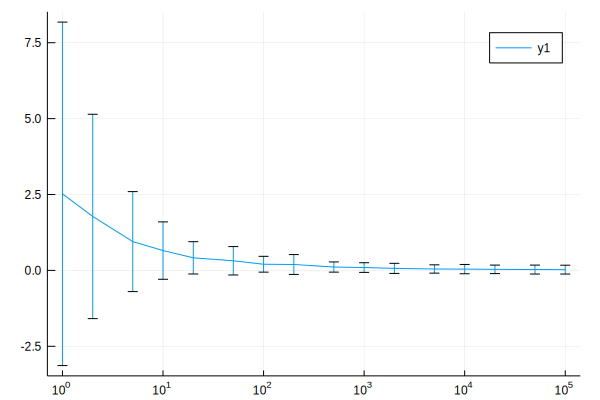

In [154]:
using DataFrames
using Statistics
using Plots
df = DataFrame(num_particles=Int64[],cp=Float64[],experimental_cp=Float64[],etas=Float64[])
x_list = [1,2,5,10,20,50,100,200,500,1000,2000,5000,10000,20000,50000,100000]
max_attempts = 10000
# Defining global variables
n1 = 0
n2 = 0
t1 = 0
t2 = 0
nn = 0
lambda = 0
for k in 1:200
    #println("Next k")
    theoretical_cp = 0.0
    attempts = 0
    while theoretical_cp < 0.01 && attempts < max_attempts
        n1 = rand(1:20)
        t1 = rand()*20
        n2 = rand(1:20)
        t2 = rand()*20
        nn = rand(1:5)
        lambda = rand()
        theoretical_cp = get_collision_probability_node2(n1,t1,n2,t2,nn,lambda)[1]
        attempts += 1
    end
    for x in x_list
        experimental_cp = count_conflicts(n1,t1,n2,t2,nn,lambda,x)
        ecart_relatif = abs(experimental_cp-theoretical_cp)/theoretical_cp
        if abs(ecart_relatif) > 0.5 && x > 2000
            println("Exception case occured! Returned something really wrong.")
            println("n1: ", n1, " t1: ", t1, " n2: ", n2, " t2: ", t2, " nn: ", nn, " lambda: ", lambda)
        end
        push!(df,[x,theoretical_cp,experimental_cp,ecart_relatif])
    end
end

ys = []
stds = []
for x in x_list
    indexes = findall((df[1].==x) .& (df[2] .> 0.01) .& (df[2] .< 1.0) .& (df[3] .> 0.01))
    values = df[4][indexes]
    y = mean(values)
    stdv = std(values)
    append!(ys,y)
    append!(stds,stdv)
end

plot(x_list,ys,yerror=stds,xscale = :log10)

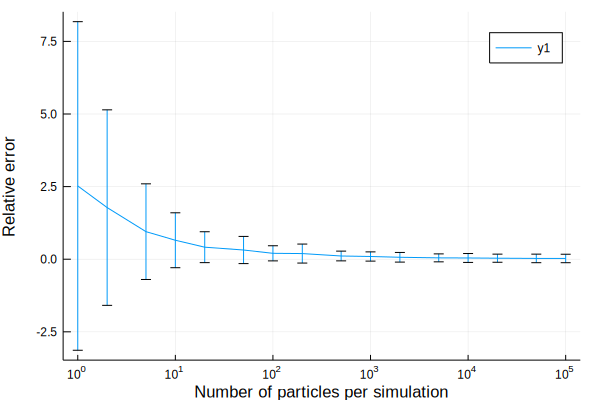

In [159]:
plot(x_list,ys,yerror=stds,xscale = :log10,xlabel="Number of particles per simulation", ylabel="Relative error")

In [66]:
df[4]

1300-element Array{Float64,1}:
 0.0                  
 0.0                  
 0.0                  
 0.0                  
 0.0                  
 0.0                  
 0.0                  
 2.62440777194742e12  
 2.0995262175579358e12
 7.87322331584226e11  
 1.4434242745710808e12
 1.6271328186074001e12
 1.207227575095813e12 
 ⋮                    
 0.0                  
 0.0                  
 0.0                  
 0.0                  
 0.0                  
 0.0                  
 0.0                  
 0.0                  
 0.0                  
 0.0                  
 0.0                  
 0.0                  

In [54]:
df[4]

70-element Array{Float64,1}:
 NaN                 
 NaN                 
 NaN                 
 NaN                 
 NaN                 
 NaN                 
 NaN                 
   0.0               
   0.0               
   0.0               
   0.0               
   0.0               
   0.0               
   ⋮                 
   0.0               
  13.837496095790588 
  10.37812207184294  
  12.453746486211527 
   9.686247267053412 
   0.0               
   0.0               
   2.4815753161133696
   2.4815753161133696
   2.4815753161133696
   1.9852602528906955
   1.9852602528906955

In [46]:
indexes = findall(df[1].==1)
df[1][indexes]

10-element Array{Int64,1}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [ ]:
using Random
typeof(shuffle(collect((1,2,3)))[1:end])

In [ ]:
using LightGraphs, MetaGraphs
#using Iterators

v = Vector{Edge}()
for k in 1:5
    push!(v,Edge(k,k+1))
end

In [ ]:
typeof(v)

In [ ]:
eltype(MetaGraph())

In [ ]:
using JLD
save_experiment_set(exp_set)

In [ ]:
plot_SVtime_vs_nrobots(["results/003Experiment_Set_001.jld"])

In [ ]:
using JLD
exp_s = load("results/001Experiment_Set_001.jld")

In [ ]:
data = Vector{}()

In [ ]:
using Pkg
Pkg.add("DataFrames")

In [ ]:
using DataFrames
thing = DataFrame(A=String[])

In [ ]:
myvector = Vector{}([1.0,2.0])
mytuple = (1,2,3)

In [ ]:
thing = DataFrame(a=String[],b=Vector{Float64}[],c = Tuple{Float64,Float64}[])

In [ ]:
push!(thing, ["M", myvector,(1.0,3.0)])

In [15]:
string(name,"1")

"First_test1"

In [16]:
string('i',string(1))

"i1"

In [9]:
string(1)

"1"

In [6]:
using LightGraphs, MetaGraphs

In [30]:
rand()

0.1731189722661175

In [9]:
elt = [v for v in vertices(g)]

0-element Array{Int64,1}

In [3]:
function dostuff!(a,b,c=0)
    a[1] = 5
    b[1] = 2
    c = c+5
end

dostuff! (generic function with 2 methods)

In [4]:
a = [1,2]
b = [-4]
c = 13
dostuff!(a,b,c)
println(a)
println(b)
println(c)

[5, 2]
[2]
13


In [4]:
using CSV
using DataFrames

In [5]:
CSV.write("First_test.csv",data)

"First_test.csv"

In [7]:
retrieved_data = DataFrame(CSV.File("First_test.csv"))

,name,Id,CBS,success,lambda,epsilon,t_delay,num_trials,num_agents,cbs_time_steps,solving_time,integraltime,time_spent_on_astar,num_interactions,solution_cost,global_cp,conflict_counts_locally,probability_error
,String⍰,Int64⍰,Bool⍰,Bool⍰,Float64⍰,Float64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Float64⍰,Float64⍰,Int64⍰,Float64⍰,Float64⍰,String⍰,String⍰
1,First_test_1,1,false,true,0.2,0.2,0.5,1000,4,-1,4.26739,1.51339,1.85985,5,37.0,0.004994,"[3.0, 2.0]","(0.02129724712950696, 0.002395470255599463)"
2,First_test_2,2,false,true,0.2,0.2,0.5,1000,3,-1,1.20385,0.18226,0.875366,10,29.0,0.0,Float64[],"(NaN, NaN)"
3,First_test_3,3,false,false,0.2,0.2,0.5,1000,6,-1,545.611,198.366,345.576,10,9.22337e18,0.0,Float64[],"(NaN, NaN)"


In [43]:
mylist = retrieved_data.probability_error[1]

"(NaN, NaN)"

In [44]:
[parse(Float64, ss[1:end-1]) for ss in split(mylist[2:end])]

2-element Array{Float64,1}:
 NaN
 NaN

In [17]:
num_trials = 100000
range(1,stop=num_trials,length=10)

1.0:11111.0:100000.0

In [11]:
maximum(data2[1])

0.7977942753134999

In [ ]:
idxs = findall(data2[2].==0.0)

In [10]:
max(1,2)

2

In [ ]:
data2[2][idxs]